In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import h5py

In [3]:
# here I load the recon_test file
recon_test = h5py.File('/home/svangurp/scratch/reconstructions/fastmri_brain_test/zero_filled/from_test_set/file_brain_AXFLAIR_200_6002441.h5', 'r')
recon_test.keys()
recon_test = recon_test['reconstruction']
recon_test.shape

(16, 640, 320)

In [4]:
recon_train = h5py.File('/home/svangurp/scratch/reconstructions/fastmri_brain_test/zero_filled/from_train_set/file_brain_AXFLAIR_200_6002425.h5', 'r')
recon_train.keys()

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>

In [5]:
recon_train_kspace = recon_train['kspace']
recon_train = recon_train['reconstruction_rss']

recon_train.shape

(16, 320, 320)

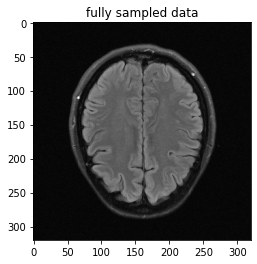

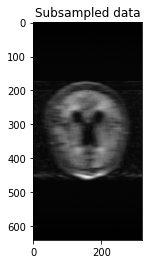

In [6]:
plt.imshow(np.abs(recon_train[5]), cmap='gray')
plt.title('fully sampled data')
plt.show()

plt.imshow(np.abs(recon_test[0]), cmap='gray')
plt.title('Subsampled data')
plt.show()

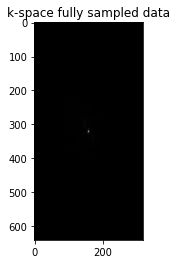

In [7]:
recon_train_kspace.shape
plt.imshow(np.abs(recon_train_kspace[0][5]), cmap='gray')
plt.title('k-space fully sampled data')
plt.show()